# Import

In [1]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import time
import copy
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split, SubsetRandomSampler
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import os
import re
import shutil
import sys
import ipywidgets
from scipy import stats
from os import listdir
from textwrap import wrap
import statistics
from sklearn.metrics import r2_score
#from pytorch_lightning.callbacks import ModelCheckpoint

ModuleNotFoundError: No module named 'torch'

In [ ]:
AVAIL_GPUS = torch.cuda.device_count()
print(AVAIL_GPUS)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [1]:
rows = []
for i in range(57):
    rows.append(i)

In [2]:
cols = []
for i in range(38):
    cols.append(i)

In [3]:
# just for 2030
rows_2030 = [0,3, 6, 9, 12, 15, 18, 21, 24, 27, 28, 29, 30, 31, 32, 33, 51, 54]

In [4]:
srows_2030 = []
for i in range(57):
    if i not in rows_2030:
        srows_2030.append(i)

In [5]:
print(srows_2030)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56]


In [6]:
cols_2030 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 23, 26, 29, 32, 35]

In [7]:
cols_2040 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 19, 21, 24, 27, 30, 33, 36]

In [8]:
cols_2050 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 14, 17, 20, 22, 25, 28, 31, 34, 37]

In [9]:
import pandas as pd
df = pd.read_excel('Cluesters_54new_newcolorcode.xlsx', header = 0, nrows = 54, engine='openpyxl')

In [10]:
import pandas as pd
df_2030 = pd.read_excel('Cluesters_54new_newcolorcode.xlsx', header = 0, 
                        usecols = cols_2030, nrows = 54, engine='openpyxl')

In [11]:
df_2040 = pd.read_excel('Cluesters_54new_newcolorcode.xlsx', header = 0, 
                        usecols = cols_2040, nrows = 54, engine='openpyxl')

In [12]:
df_2050 = pd.read_excel('Cluesters_54new_newcolorcode.xlsx', header = 0, 
                        usecols = cols_2050, nrows = 54, engine='openpyxl')

In [13]:
cols2030_names = ['Capital cost of Coal', 'Capital cost of Diesel', 'Capital cost of Gas', 'Capital cost of Nuclear', 
                  'Capital cost of GasSC', 'Capital cost of Biomass', 'Capital cost of Wind',
                          'Capital cost of Solar', 'Carbon Tax', 'Population growth BC', 'Population growth AB',
                  'Population growth SK', 'Population growth MB', 'Population growth QC', 'Population growth NB',
                          'Population growth PE', 'Population growth NS', 'Population growth NL' ]

In [14]:
cols2040_names = ['Capital cost of Coal', 'Capital cost of Diesel', 'Capital cost of Gas', 'Capital cost of Nuclear', 
                  'Capital cost of GasSC', 'Capital cost of Biomass', 'Capital cost of Wind',
                          'Capital cost of Solar', 'Carbon Tax', 'Population growth BC', 'Population growth AB',
                  'Population growth SK', 'Population growth MB', 'Population growth ON', 'Population growth QC', 'Population growth NB',
                          'Population growth PE', 'Population growth NS', 'Population growth NL']

In [15]:
cols2050_names = ['Capital cost of Coal', 'Capital cost of Diesel', 'Capital cost of Gas', 'Capital cost of Nuclear', 
                  'Capital cost of GasSC', 'Capital cost of Biomass', 'Capital cost of Wind',
                          'Capital cost of Solar', 'Carbon Tax', 'Population growth BC', 'Population growth AB',
                  'Population growth SK', 'Population growth MB', 'Population growth ON', 'Population growth QC', 'Population growth NB',
                          'Population growth PE', 'Population growth NS', 'Population growth NL' ]

In [16]:
rows2030_names = ['Emission AB', 'Emission NB', 'Emission NS', 'Emission PE',
                  'Gas generation NB', 'Gas generation NS','Wind generation AB','Wind generation SK','Wind generation MB',
                  'Wind generation ON', 'Wind generation NL', 'Wind generation NS', 'Wind generation PE'
                 ,'Gas generation Canada', 'Wind generation Canada']

In [17]:
rows2040_names = ['Emission AB', 'Emission ON', 'Emission QC', 'Emission NB', 'Emission NS', 'Emission PE', 'Gas generation AB',
                  'Gas generation NB', 'Gas generation NS', 'Gas generation PE','Wind generation AB','Wind generation SK','Wind generation MB',
                  'Wind generation ON', 'Wind generation QC','Wind generation NL', 'Wind generation NS', 'Wind generation PE'
                 ,'Gas generation Canada', 'Wind generation Canada']

In [18]:
rows2050_names = ['Emission AB', 'Emission ON', 'Emission QC', 'Emission NB', 'Emission NS', 'Emission PE', 'Gas generation QC',
                  'Gas generation NB', 'Gas generation NS', 'Gas generation PE','Wind generation AB','Wind generation SK','Wind generation MB',
                  'Wind generation ON', 'Wind generation QC', 'Wind generation NS', 'Wind generation PE'
                 ,'Gas generation Canada', 'Wind generation Canada']

In [19]:
list_2030 = [0, 7, 10, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 48, 51]


drop_rows_2030 = []
for i in range(54):
    if i not in list_2030:
        drop_rows_2030.append(i)

In [20]:
from pandas import DataFrame
df_2030 = df_2030.drop(drop_rows_2030)
print(df_2030)

    0   1   2   3   4   5   6   7   8   9   12  15  18  23  26  29  32  35
0    3   3   3   3   3   3   5   4   1   4   4   4   4   4   4   4   4   4
7    3   3   3   3   3   3   5   4   1   4   4   4   4   4   4   4   4   4
10   3   3   3   3   3   3   5   4   8   5   5   3   4   5   5   4   5   3
13   3   3   3   3   3   3   2   3   2   3   3   3   3   3   3   3   3   3
16   4   4   2   3   3   3   4   4   1   3   3   3   3   3   3   3   3   3
17   3   4   3   3   4   4   4   4   2   4   4   4   4   4   4   4   4   3
18   4   4   2   3   7   3   1   2   6   3   3   3   3   4   3   3   4   4
19   3   3   3   3   3   3   1   2   5   3   3   3   3   3   3   3   3   3
20   3   3   3   3   3   3   1   2   4   3   3   3   3   3   3   3   3   3
21   4   4   2   3   7   3   2   3   3   4   4   4   4   4   4   4   4   4
22   3   3   3   3   8   3   5   4   6   3   4   3   4   3   4   3   3   3
23   4   3   3   3   3   3   1   1   6   3   3   3   3   3   3   3   3   3
24   3   3   4   3   3   

In [21]:
df_2030_2 = df_2030.set_axis(cols2030_names, axis=1)
df_2030_2 = df_2030_2.set_axis(rows2030_names, axis=0)

In [22]:
list2040 =[1, 3, 5, 8, 11, 14, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 49, 52]

drop_rows_2040 = []
for i in range(54):
    if i not in list2040:
        drop_rows_2040.append(i)

In [23]:
print(drop_rows_2040)

[0, 2, 4, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53]


In [24]:
from pandas import DataFrame
df_2040 = df_2040.drop(drop_rows_2040)
print(df_2040)

    0   1   2   3   4   5   6   7   8   10  13  16  19  21  24  27  30  33  36
1    3   3   3   3   3   3   5   4   1   4   4   4   4   4   4   4   4   4   4
3    3   3   3   3   3   3   4   3   1   3   3   3   3   3   3   3   3   3   3
5    3   3   3   3   3   3   2   3   2   3   3   3   3   3   3   3   3   3   3
8    3   3   3   3   3   3   5   3   1   3   3   3   3   3   3   3   3   3   3
11   3   3   3   3   3   3   4   4   1   4   3   4   3   4   4   3   3   4   3
14   3   3   3   3   3   3   6   3   2   3   3   3   3   3   3   3   3   3   3
25   3   3   3   3   3   3   4   3   1   3   3   3   3   3   3   3   3   3   3
26   3   3   3   3   3   3   4   3   1   3   3   3   3   3   3   3   3   3   3
27   3   3   3   4   8   4   4   4   1   4   3   4   3   4   4   3   3   4   3
28   3   3   3   3   7   3   7   3   8   3   4   4   3   3   3   4   4   4   4
29   3   3   3   3   3   3   2   3   5   3   3   3   3   3   3   3   3   3   3
30   3   3   4   3   3   4   7   4   6   3   3   4  

In [25]:
df_2040_2 = df_2040.set_axis(cols2040_names, axis=1)
df_2040_2 = df_2040_2.set_axis(rows2040_names, axis=0)

In [26]:
list2050 =[2, 4, 6, 9, 12, 15, 37, 38, 39, 40 , 41, 42, 43, 44, 45, 46, 47, 50, 53]

drop_rows_2050 = []
for i in range(54):
    if i not in list2050:
        drop_rows_2050.append(i)

In [27]:
from pandas import DataFrame
df_2050 = df_2050.drop(drop_rows_2050)
print(df_2050)

    0   1   2   3   4   5   6   7   8   11  14  17  20  22  25  28  31  34  37
2    3   3   3   3   3   3   5   4   1   3   3   3   3   3   3   3   3   3   3
4    3   3   3   3   3   3   8   4   1   3   4   3   4   3   3   3   3   3   3
6    3   3   3   3   3   3   3   3   2   3   3   3   3   3   3   3   3   3   3
9    3   3   3   3   3   3   4   3   1   3   3   3   3   3   3   3   3   3   3
12   3   3   3   3   3   3   4   4   1   3   4   4   4   3   4   3   3   4   3
15   3   3   3   3   3   3   3   3   2   3   3   3   3   3   3   3   3   3   3
37   3   4   3   3   3   3   4   3   1   4   4   4   4   4   4   4   4   4   4
38   3   3   3   3   3   3   3   3   1   3   3   3   3   3   3   3   3   3   3
39   3   3   3   3   3   4   4   4   1   3   3   3   3   3   3   3   3   4   3
40   3   3   3   3   3   3   3   3   2   3   4   3   3   4   3   4   3   4   4
41   4   4   3   3   3   3   2   3   6   4   4   4   7   4   6   3   4   4   4
42   3   4   3   4   4   5   7   5   6   4   4   4  

In [28]:
df_2050_2 = df_2050.set_axis(cols2050_names, axis=1)
df_2050_2 = df_2050_2.set_axis(rows2050_names, axis=0)

In [29]:
import matplotlib.pyplot as plt
# set the font globally
plt.rcParams.update({'font.family':'sans-serif'})
# set the font name for a font family
plt.rcParams.update({'font.sans-serif':'Cambria'})

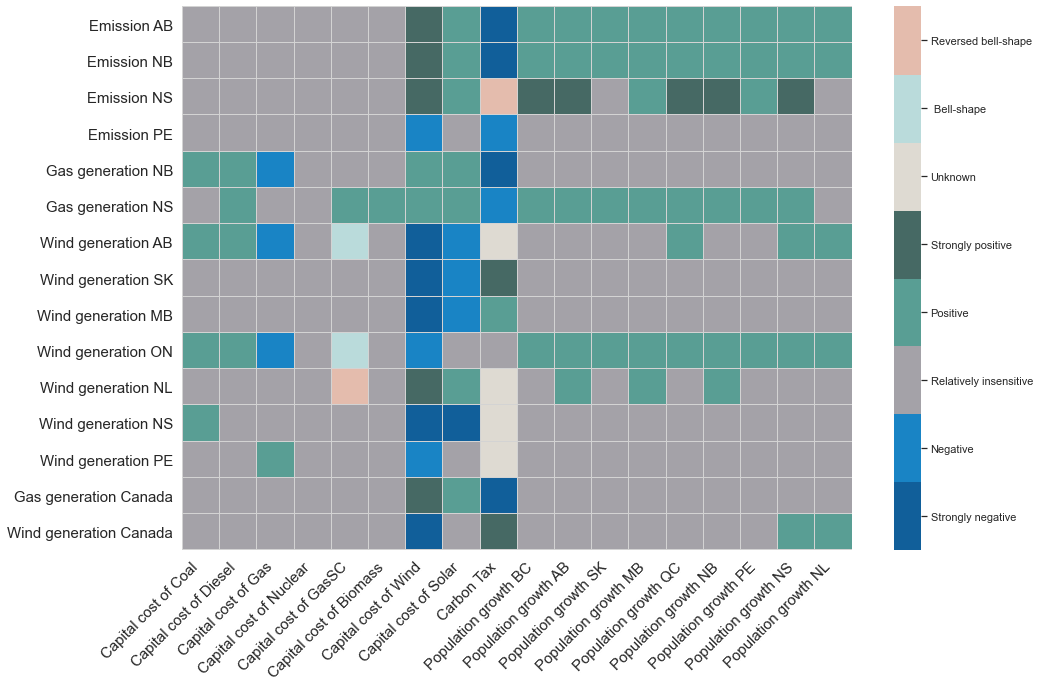

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#TODO the data you are visualizing is categorical data not continuous, and the visualization that you are using is designed for continuous data
# I have solved your problem of showing different distinct categories by adding a custom color pallete and fixing the vmin, vmax, and color bar tick values. 
# The remaining issue though is the order of the legend.
# This issue is caused by seaborn reading your range of 1-8 as continous this cant be changed within seaborn. 
# to hack around this you will have to change the creation of the data so that: 
# positive/negative values are clumped together so the range from 1-5 and then unknown, bell shaped and reversed bell shaped are seperate as 6 7 8
# once you do this, the below code will render a visualiation that you seek
# the only remaining task will be to adjust the color values in the color list to fit your liking
# this is a good website for picking color palletes: https://colorswall.com/palette/171299

#Here is where you can change the color map used in the visualzation the order of the colors match this list

colors = ["#115f9a","#1984c5","#a4a2a8", "#599e94", "#466964","#dedad2","#badbdb","#e4bcad"]

# Set your custom color palette
colors = sns.color_palette(colors)

# plot a heatmap
sns.set(rc = {'figure.figsize':(15,10)})

#Added annot here so you can see the values being visualized easier
#changed vmin and vmax values to not cut off end values #NOTE this should be done for all other plots as values dont match what they allign with on the color legend
#changed cmap to be custom color_palette object
ax = sns.heatmap(df_2030_2, linewidths=0.005, linecolor='lightgray', robust=True, cmap=colors, fmt=".1f", vmin=.5, vmax=8.5)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [1,2,3,4,5,6,7,8], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'Negative', 'Relatively insensitive', 'Positive','Strongly positive',  'Unknown', ' Bell-shape',  'Reversed bell-shape'])


_, labels = plt.xticks()
plt.setp(labels, rotation=45, horizontalalignment='right', fontsize = 15)
_, labels = plt.yticks()
plt.setp(labels, fontsize = 15)

plt.savefig('heatmap2030_final.png', bbox_inches='tight')


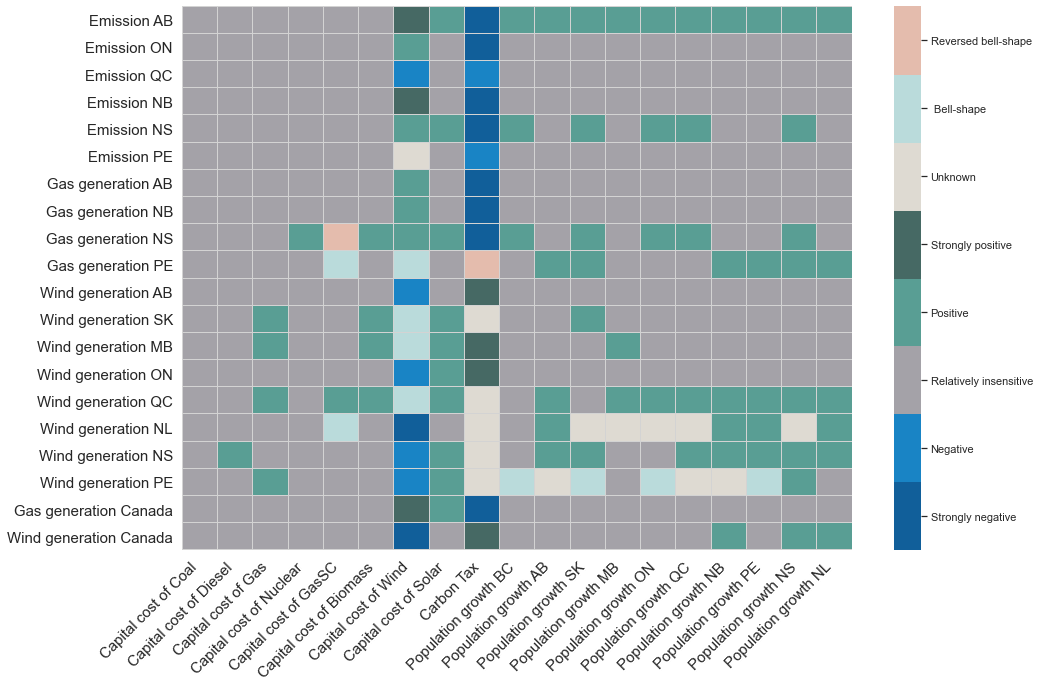

In [30]:


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


colors = ["#115f9a","#1984c5","#a4a2a8", "#599e94", "#466964","#dedad2","#badbdb","#e4bcad"]

# Set your custom color palette
colors = sns.color_palette(colors)

# plot a heatmap
sns.set(rc = {'figure.figsize':(15,10)})

#Added annot here so you can see the values being visualized easier
#changed vmin and vmax values to not cut off end values #NOTE this should be done for all other plots as values dont match what they allign with on the color legend
#changed cmap to be custom color_palette object
ax = sns.heatmap(df_2040_2, linewidths=0.005, linecolor='lightgray', robust=True, cmap=colors, fmt=".1f", vmin=.5, vmax=8.5)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [1,2,3,4,5,6,7,8], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'Negative', 'Relatively insensitive', 'Positive','Strongly positive',  'Unknown', ' Bell-shape',  'Reversed bell-shape'])


_, labels = plt.xticks()
plt.setp(labels, rotation=45, horizontalalignment='right', fontsize = 15)
_, labels = plt.yticks()
plt.setp(labels, fontsize = 15)
plt.savefig('heatmap2040_final.png' , bbox_inches='tight')



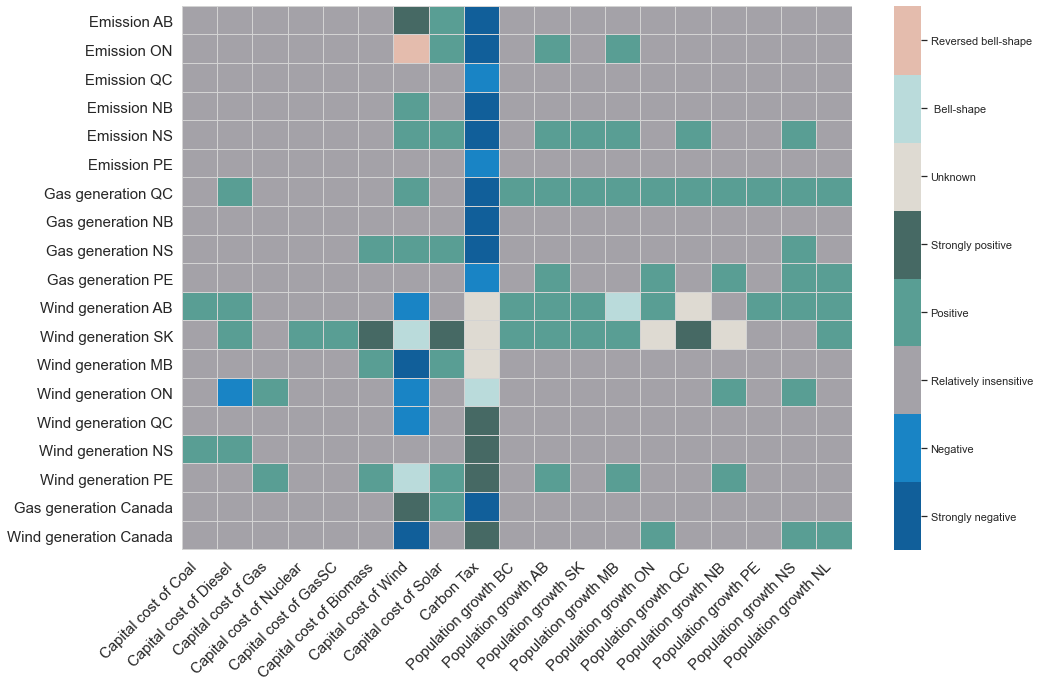

In [31]:


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


colors = ["#115f9a","#1984c5","#a4a2a8", "#599e94", "#466964","#dedad2","#badbdb","#e4bcad"]

# Set your custom color palette
colors = sns.color_palette(colors)

# plot a heatmap
sns.set(rc = {'figure.figsize':(15,10)})

#Added annot here so you can see the values being visualized easier
#changed vmin and vmax values to not cut off end values #NOTE this should be done for all other plots as values dont match what they allign with on the color legend
#changed cmap to be custom color_palette object
ax = sns.heatmap(df_2050_2, linewidths=0.005, linecolor='lightgray', robust=True, cmap=colors, fmt=".1f", vmin=.5, vmax=8.5)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [1,2,3,4,5,6,7,8], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'Negative', 'Relatively insensitive', 'Positive','Strongly positive',  'Unknown', ' Bell-shape',  'Reversed bell-shape'])


_, labels = plt.xticks()
plt.setp(labels, rotation=45, horizontalalignment='right', fontsize = 15)
_, labels = plt.yticks()
plt.setp(labels, fontsize = 15)
plt.savefig('heatmap2050_final.png', bbox_inches='tight')



In [34]:
import pandas as pd
df = pd.read_excel('Cluesters_54new.xlsx', header = 0, nrows = 54, engine='openpyxl')

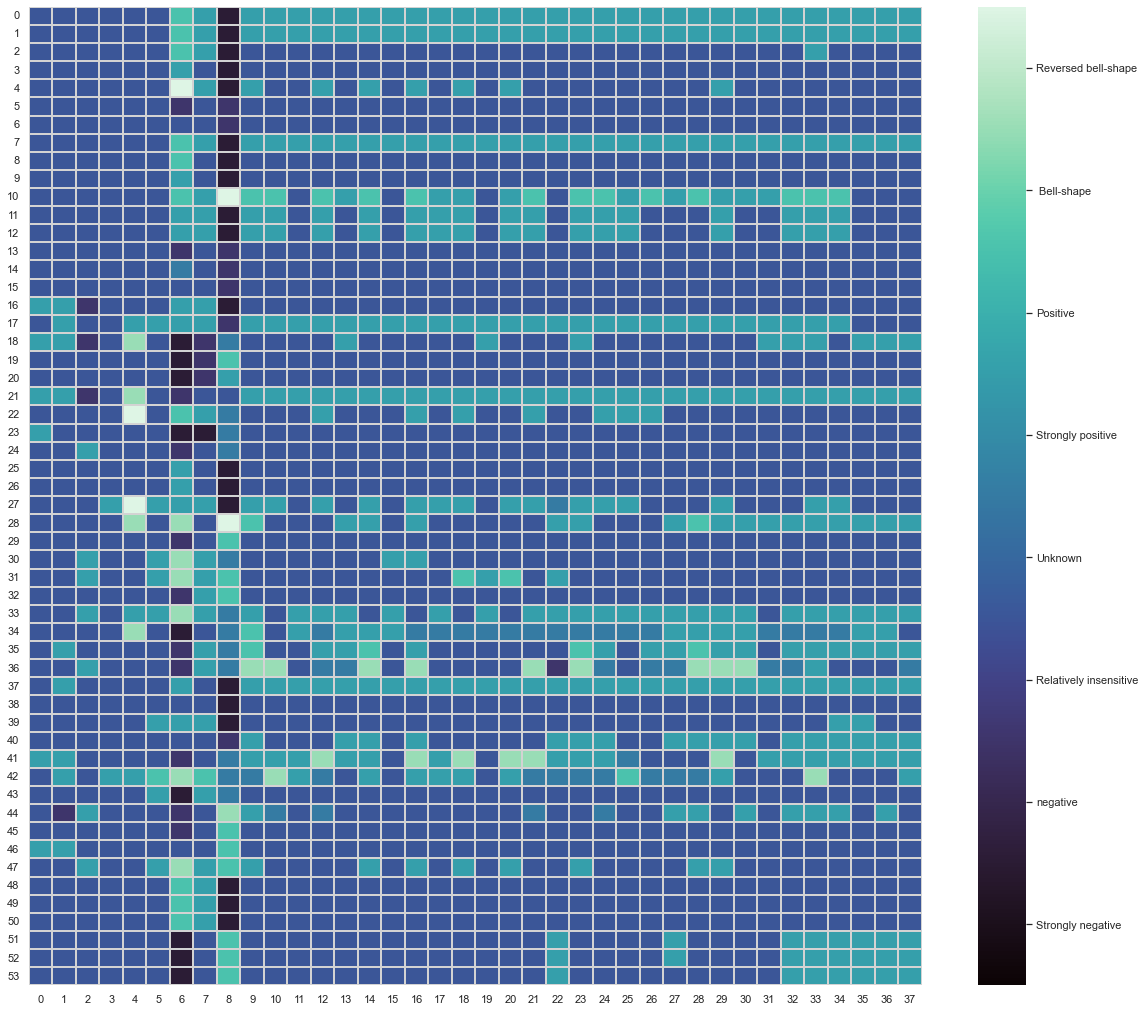

In [35]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plot a heatmap
sns.set(rc = {'figure.figsize':(20,18)})
ax = sns.heatmap(df, linewidths=0.005, linecolor='lightgray', robust=True, fmt="f", cmap='mako', vmin=0, vmax=8)


# cmap = sns.diverging_palette(240, 8, as_cmap=True)
# ax = sns.heatmap(df, linewidths=0.005, linecolor='lightgray', robust=True,cmap=cmap, vmin=0, vmax=8)



colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'negative', 'Relatively insensitive', 'Unknown', 'Strongly positive', 'Positive', ' Bell-shape',  'Reversed bell-shape' ])




# X - Y axis labels
# ax.set_ylabel('Outputs')
# ax.set_xlabel('Inputs')

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.savefig('heatmap54.png')
# sns.palplot(sns.diverging_palette(200, 100, n=11))
# sns.color_palette(palette=None, n_colors=8, desat=None, as_cmap=False,  )
# sns.color_palette("rocket", as_cmap=True)